<a href="https://colab.research.google.com/github/josmartinezbe/Clases/blob/main/Visor_gpx_1020803370.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualización de rutas GPX con Python
Proyecto básico para el manejo de biblioteca folium y gpxpy para mosrtar mapas en un cuaderno jupyter en Google Colab
# Estudiante: Johan Sebastián Martinez Bejarano

In [3]:
!pip install folium

## Función cargar gpx()
Función para extraer los puntos desde n archivo GPX.

In [4]:
!pip install gpxpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00


In [5]:
import gpxpy

def cargar_gpx():

  with open('/content/drive/MyDrive/ESIG/POO/Taller 1/Capa 2.gpx') as archivo_gpx:
    miGPX = gpxpy.parse(archivo_gpx)

  puntos =[]
  for ruta in miGPX.tracks:
    for segmento in ruta.segments:
      for punto in segmento.points:
        puntos.append((punto.latitude, punto.longitude))
  return puntos

## Función cargar_imagen()
Funcion que se encarga de leer una imagen, extraer la metadata EXIF, en especial los datos del gps, convertirlo a formato decimal y devolverlo junto con la imagen en formato texto

In [6]:
def convertir_a_decimal(coordenadas, referencia):
  decimal= coordenadas[0] + coordenadas[1]/60 + coordenadas[2]/3600
  if referencia == 'S' or referencia == 'W':
    decimal= -decimal
  return decimal

In [10]:
!pip install exif

In [14]:
import base64
from exif import Image

def cargar_imagen(ruta):
  with open(ruta, mode='rb') as archivo:
    datos= archivo.read()

    miImagen64= base64.b64encode(datos).decode('utf-8')

    miExif= Image(datos)
    lat = convertir_a_decimal (miExif.gps_latitude, miExif.gps_latitude_ref)
    lon = convertir_a_decimal (miExif.gps_longitude, miExif.gps_longitude_ref)

    posicion= (lat, lon)

    miCadenaDeImagen=f'data:image/jpeg;base64,{miImagen64}'
    return miCadenaDeImagen, posicion




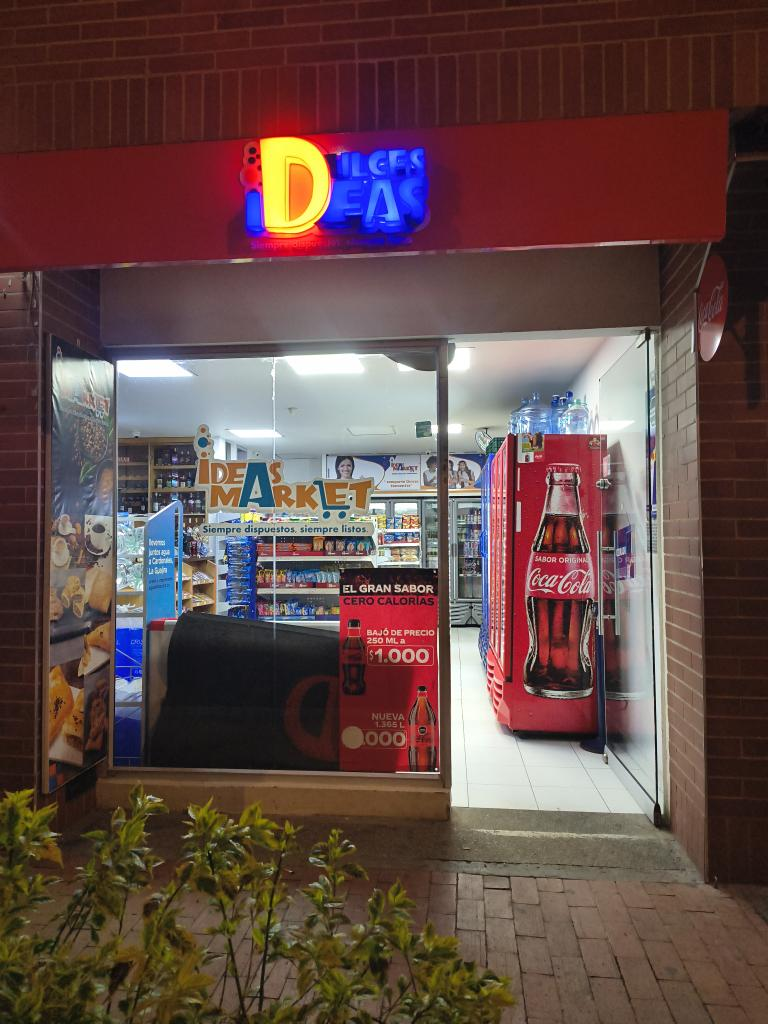
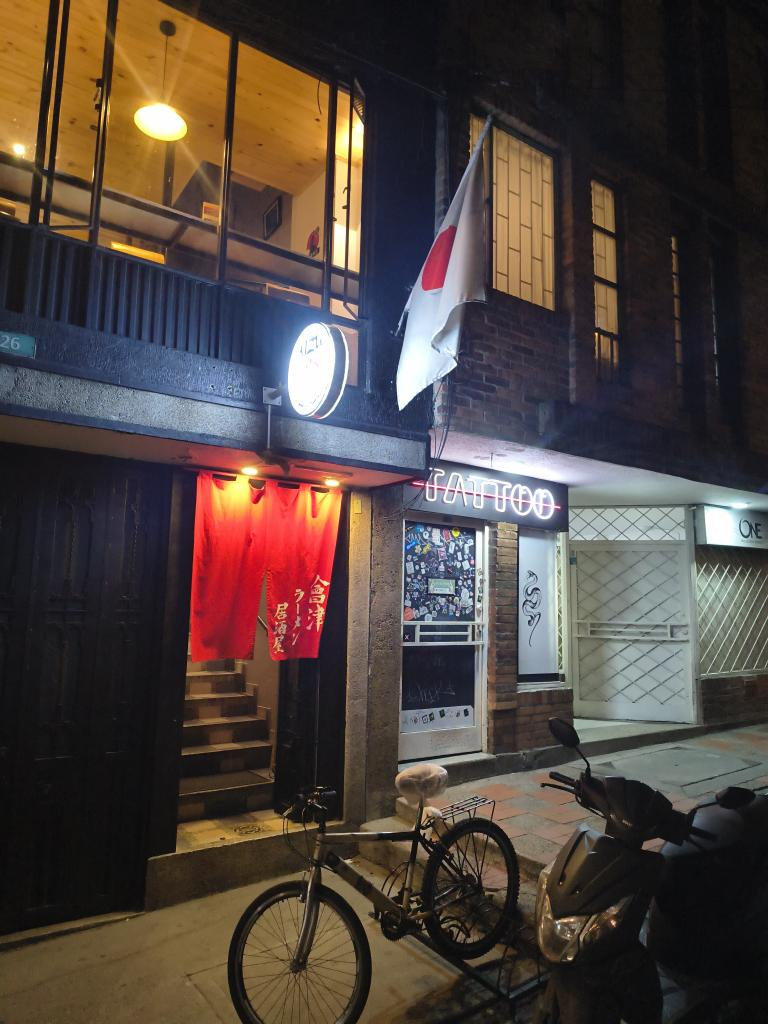
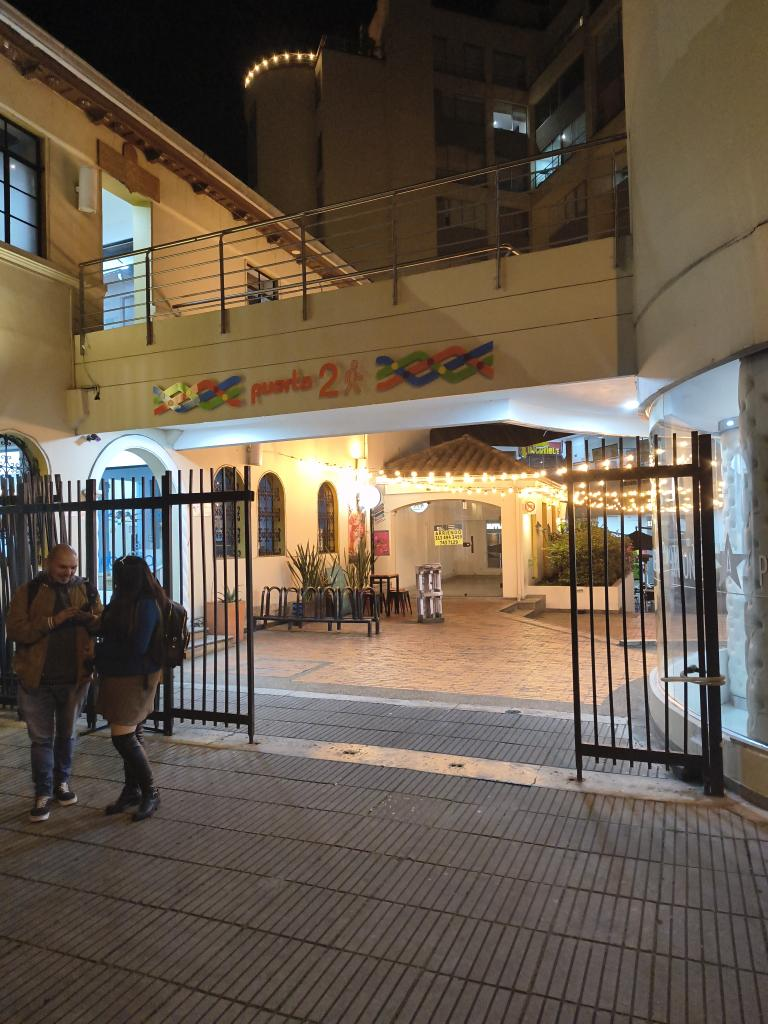
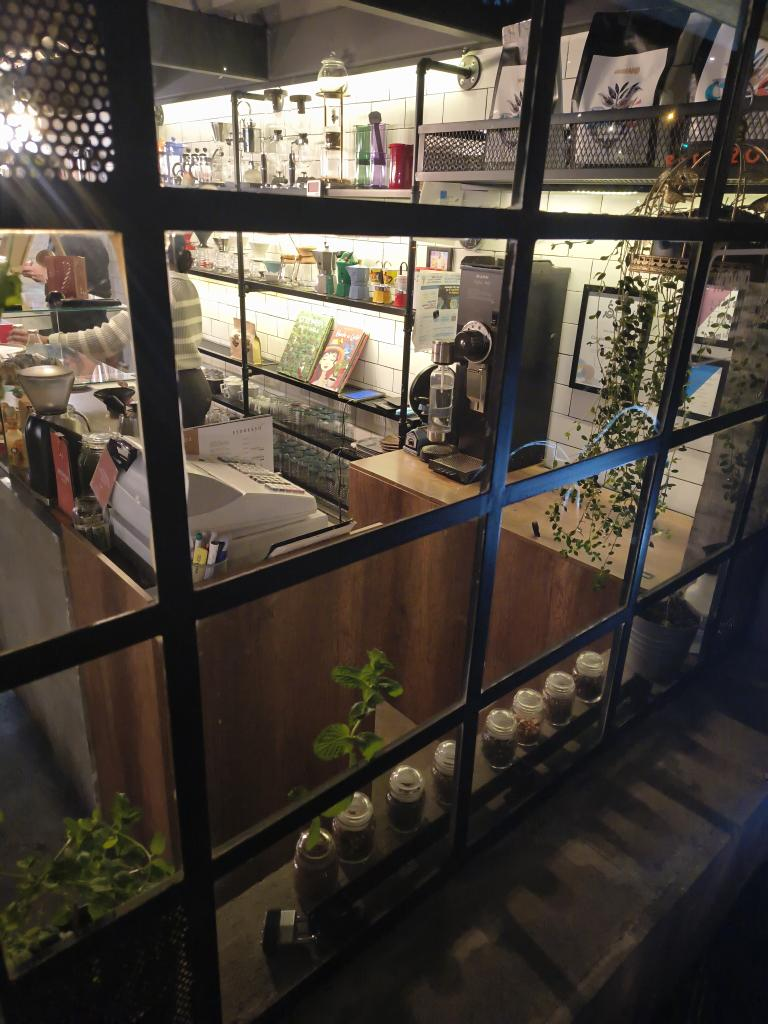
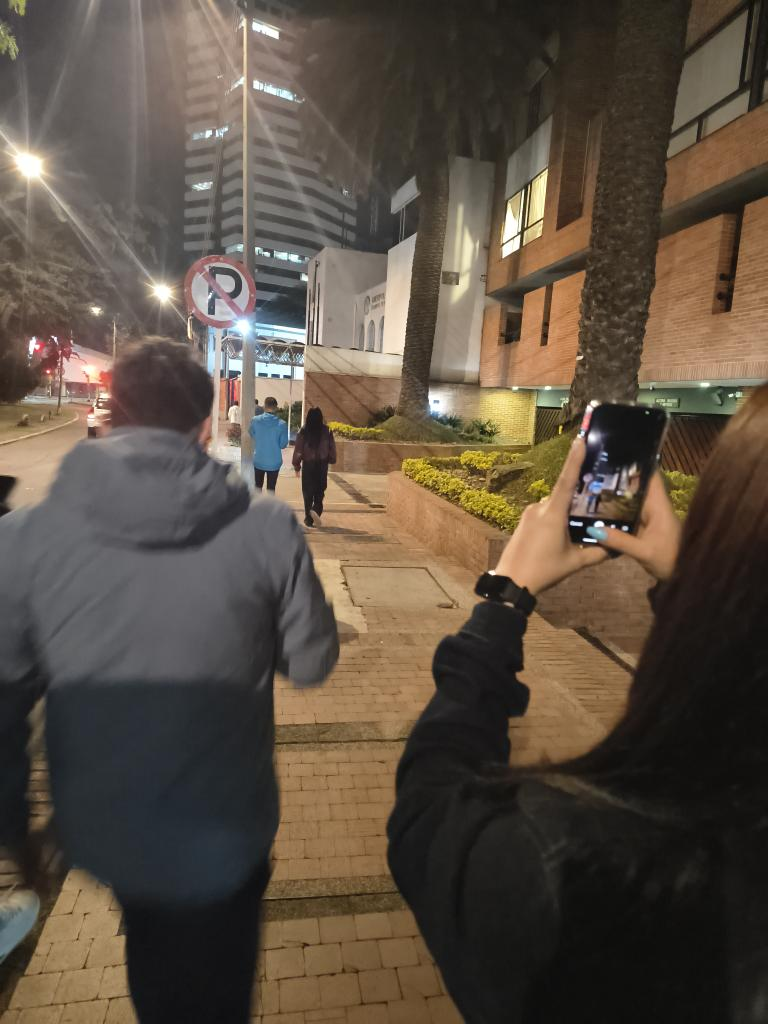
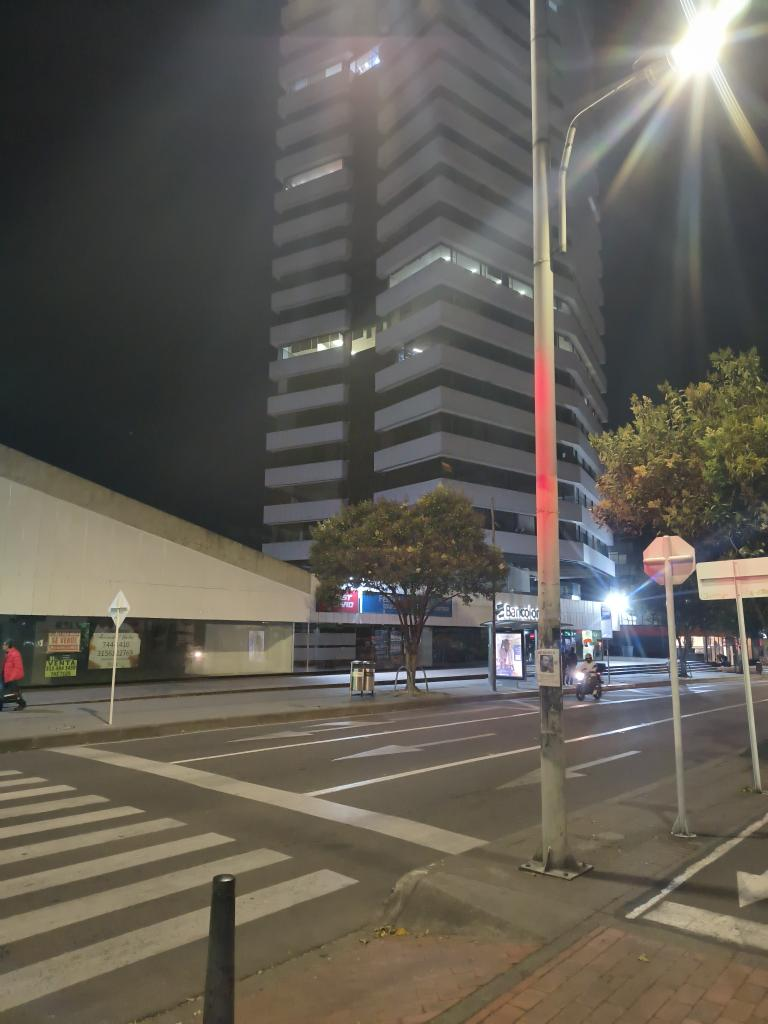
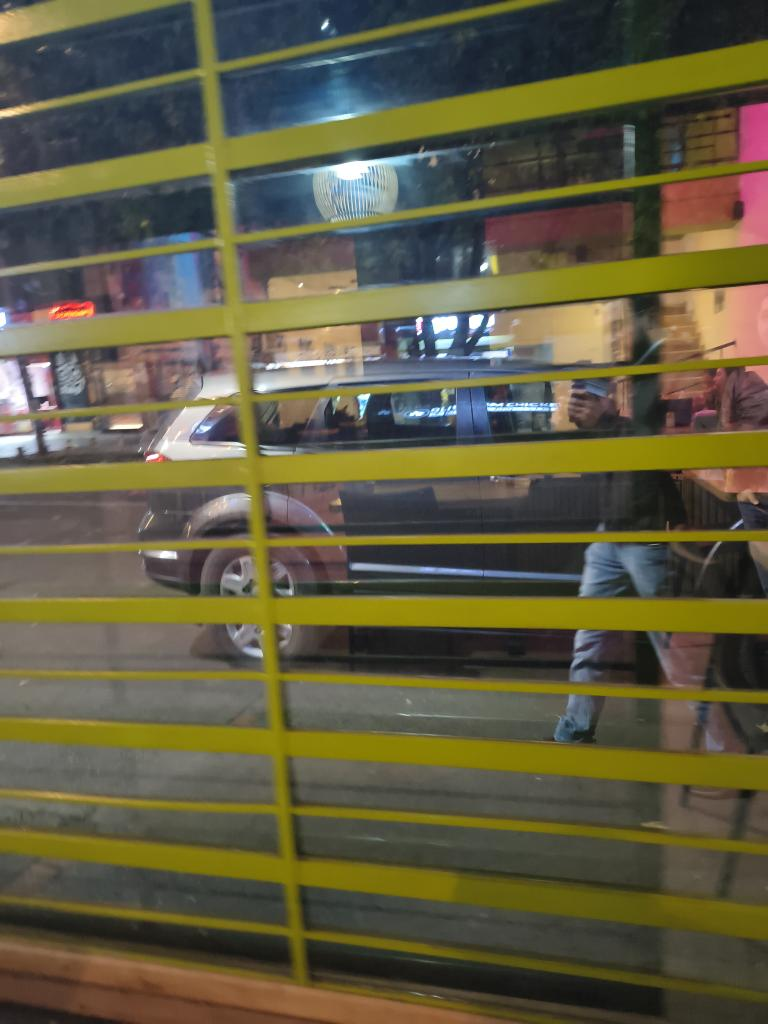

In [25]:
import folium

# Lista con las coordenadas de la UD
miSede= [4.628044006452753, -74.06575732951974]

miMapa= folium.Map(location=miSede, zoom_start=100)



# Crear polilinea a partir de una lista de puntos

puntos = cargar_gpx()
miPolilínea= folium.PolyLine(locations=puntos)

miPolilínea.add_to(miMapa)

# Cargar las imagenes georeferenciadas

for i in range(1,8):
  miImagen, ubicaciónImagen= cargar_imagen(f"drive/MyDrive/ESIG/POO/Taller 1/images/Marca de posición {i}.jpg")

  miMarcador= folium.Marker(location=ubicaciónImagen, popup=f'<img src="{miImagen}" width="150">')
  miMarcador.add_to(miMapa)

# Mostrar el mapa

miMapa